# Classification Tree Project

The data contains information on 1972 auctions that transacted on eBay.com during May–June 2004. The goal is to use 
these data to build a model that will classify auctions as competitive or non-competitive. 
A competitive auction is defined as an auction with at least two bids placed on the item 
auctioned. The data include variables that describe the item (auction category), the 
seller (their eBay rating), and the auction terms that the seller selected (auction 
duration, opening price, currency, day-of-week of auction close). In addition, we have 
the price at which the auction closed. The task is to predict whether or not the auction 
will be competitive.  

General Tasks:

* Data Preprocessing
 
* Fit a classification tree using all predictors and avoid overfitting.
 
* Find any interesting/unexpected and uninteresting information.
 
* Identify predictors to drop from model. 
 
* Assess practicality of the model to predict outcome of a new auction. 

* Fit an improved classification tree.
 
* Plot the resulting tree as a tree diagram. 
 
* Plot the resulting tree on a scatter plot: Use the two axes for the two best (quantitative) predictors, and assess if the splitting seem reasonable with respect to the meaning of the two predictors and separating the two classes. 


### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# The following packages may be missing:
# !pip install openpyxl
# !pip install dmba

# Data Preprocessing

### Data input, checking for null values

In [3]:
data = pd.read_excel('ebayAuctions.xlsx', sheet_name='eBay auctions')

In [4]:
data.head()

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [5]:
data.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [7]:
data.isnull().sum()

Category        0
Currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

We see that there are no null values in the data frame.

We will change the data type for duration from integer into an object since it is a categorical variable.

In [8]:
data['Duration'] = data['Duration'].astype(str)

### Create dummy variables from the four categorical variables. 

In [9]:
data_dum = pd.get_dummies(data, columns = ['Category','Currency','endDay','Duration'])

In [10]:
pd.set_option('display.max_columns', None)
data_dum.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies,Currency_EUR,Currency_GBP,Currency_US,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_10,Duration_3,Duration_5,Duration_7
0,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [11]:
data_dum.shape

(1972, 37)

# Exploratory Data Analysis

### Target Variable

In [12]:
data['Competitive?'].value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

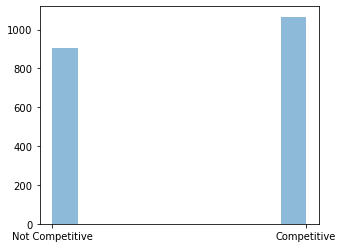

In [13]:
plt.figure(figsize=(5,4))
plt.hist(data['Competitive?'],alpha=0.5)
ticks = [0.0,1.0]
labels = ["Not Competitive","Competitive"]
plt.xticks(ticks,labels)
plt.show()

The target variable is well balanced. There is no need to perform additional balancing of the data.

### Quantitative Variables


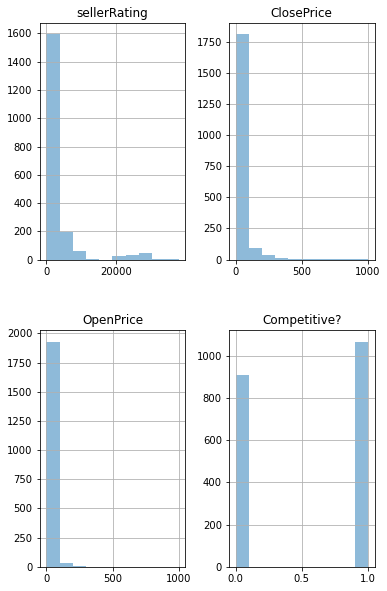

In [14]:
data.hist(figsize=(6,10),alpha=0.5)
plt.show()

From the histogram above, we can observe that `sellerRating` , `OpenPrice` and `ClosePrice` are highly skewed. Therefore, transformations may help.

In [15]:
df_corr = data[["Competitive?","sellerRating","OpenPrice","ClosePrice"]].corr()

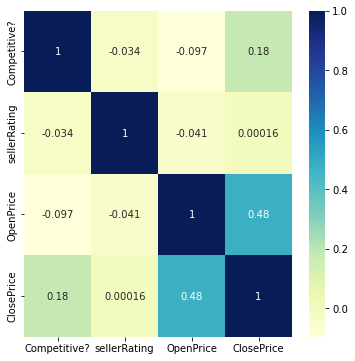

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(df_corr, annot=True, cmap="YlGnBu")
plt.show()

### Categorical variables

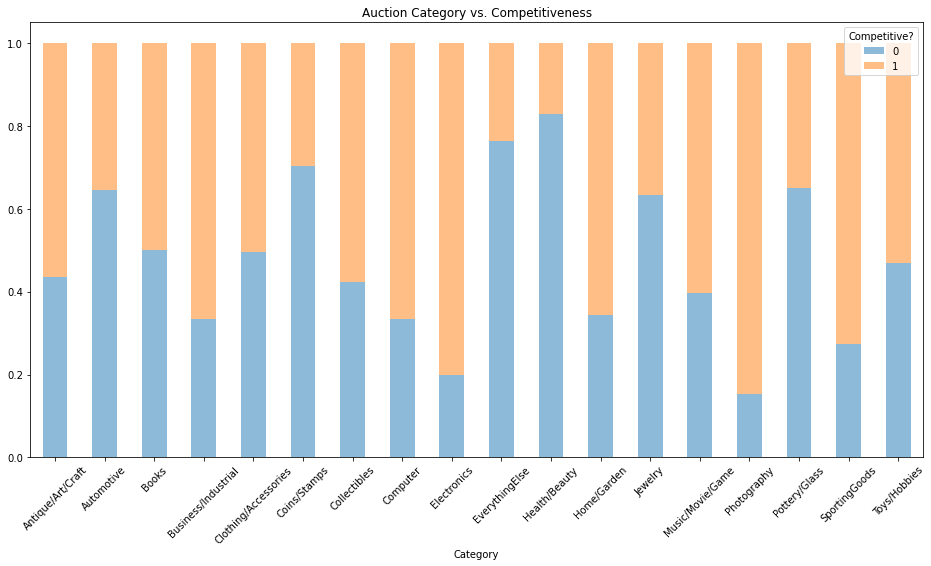

In [17]:
crosstab = pd.crosstab(data["Category"], data["Competitive?"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Auction Category vs. Competitiveness", alpha=0.5,figsize=(16,8))
plt.xticks(rotation=45)
plt.show()

We can observe significant differences among different categories.

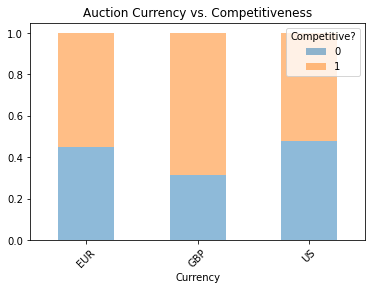

In [18]:
crosstab = pd.crosstab(data["Currency"], data["Competitive?"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Auction Currency vs. Competitiveness", alpha=0.5,figsize=(6,4))
plt.xticks(rotation=45)
plt.show()

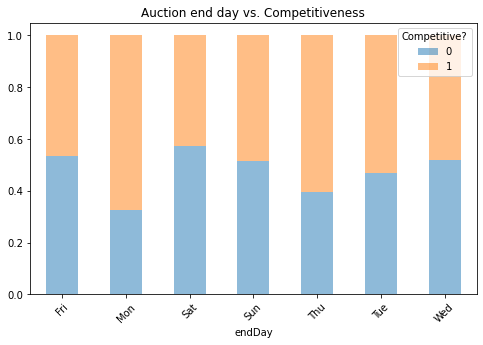

In [19]:
crosstab = pd.crosstab(data["endDay"], data["Competitive?"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Auction end day vs. Competitiveness", alpha=0.5,figsize=(8,5))
plt.xticks(rotation=45)
plt.show()

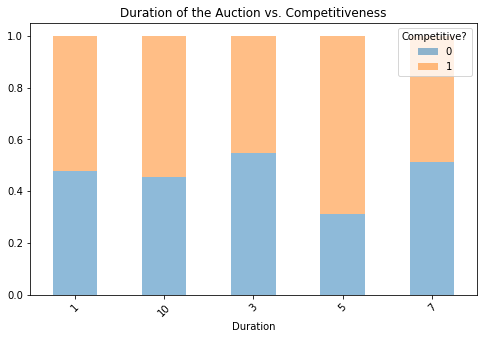

In [20]:
crosstab = pd.crosstab(data["Duration"], data["Competitive?"],normalize='index')
crosstab.plot(kind="bar", stacked=True, title="Duration of the Auction vs. Competitiveness", alpha=0.5,figsize=(8,5))
plt.xticks(rotation=45)
plt.show()

### Transformations

We ended up NOT doing transformations or scaling!

In [21]:
# from sklearn.preprocessing import StandardScaler

In [22]:
# std_scaler = StandardScaler()

In [23]:
# data_dum[['sellerRating','OpenPrice','ClosePrice']] = std_scaler.fit_transform(data_dum[['sellerRating','OpenPrice','ClosePrice']])

# Modelling

Train-test split using a 60:40 ratio.

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [25]:
df = data_dum

In [26]:
y = df["Competitive?"]

In [27]:
X = df.drop("Competitive?",axis=1)
X.head()

,sellerRating,ClosePrice,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies,Currency_EUR,Currency_GBP,Currency_US,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_10,Duration_3,Duration_5,Duration_7
0,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=100)

### Full Classification Tree
Using all the predictors. To avoid overfitting, set the minimum number of records in a terminal node 50.

In [29]:
from dmba import classificationSummary

no display found. Using non-interactive Agg backend


In [30]:
fullClassTree = DecisionTreeClassifier(min_samples_leaf=50,random_state=100)

In [31]:
fullClassTree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=100)

In [32]:
fullClassTree.score(X_train,y_train)

0.8444632290786137

In [33]:
fullClassTree.score(X_test,y_test)

0.8073510773130546

In [34]:
classificationSummary(y_train, fullClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.8445)

       Prediction
Actual   0   1
     0 490  57
     1 127 509


In [35]:
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8074)

       Prediction
Actual   0   1
     0 309  50
     1 102 328


In [36]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

#### Grid Search for Full Tree

Grid search will be performed around the vicinity of the obtained paramters above to check if the results can be improved.

In [37]:
param_grid = {
    "min_samples_split": [2,3,4,5,6],
    "min_impurity_decrease": [0, 0.0005, 0.001, 0.01]
}

In [38]:
gridSearch = GridSearchCV(DecisionTreeClassifier(min_samples_leaf=50,random_state=100), param_grid, cv=5, n_jobs=-1)

In [39]:
gridSearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(min_samples_leaf=50,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'min_impurity_decrease': [0, 0.0005, 0.001, 0.01],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [40]:
print('Improved Score: ', gridSearch.best_score_)
print('Improved Parameters: ', gridSearch.best_params_)

Improved Score:  0.8056211113494959
Improved Parameters:  {'min_impurity_decrease': 0, 'min_samples_split': 2}


This is the same result as our initial Full Tree.

In [41]:
best_tree = gridSearch.best_estimator_

In [42]:
classificationSummary(y_train, best_tree.predict(X_train))

Confusion Matrix (Accuracy 0.8445)

       Prediction
Actual   0   1
     0 490  57
     1 127 509


In [43]:
classificationSummary(y_test, best_tree.predict(X_test))

Confusion Matrix (Accuracy 0.8074)

       Prediction
Actual   0   1
     0 309  50
     1 102 328


classificationSummary(y_train, best_tree.predict(X_train))

In [44]:
coeff_df = pd.DataFrame(np.transpose(best_tree.feature_importances_), 
                        X_train.columns, columns=['Coefficient'])

In [45]:
coeff_df

,Coefficient
sellerRating,0.027306
ClosePrice,0.522508
OpenPrice,0.424989
Category_Antique/Art/Craft,0.000000
Category_Automotive,0.025196
Category_Books,0.000000
Category_Business/Industrial,0.000000
Category_Clothing/Accessories,0.000000
Category_Coins/Stamps,0.000000
Category_Collectibles,0.000000


Based on the coefficients, we can see the splits utilzied are seller rating, close price, open price, and the automotive category.

In [46]:
export_graphviz(fullClassTree, out_file='fullClassificationTree.dot', feature_names=X_train.columns)

Here's the exported graph: 


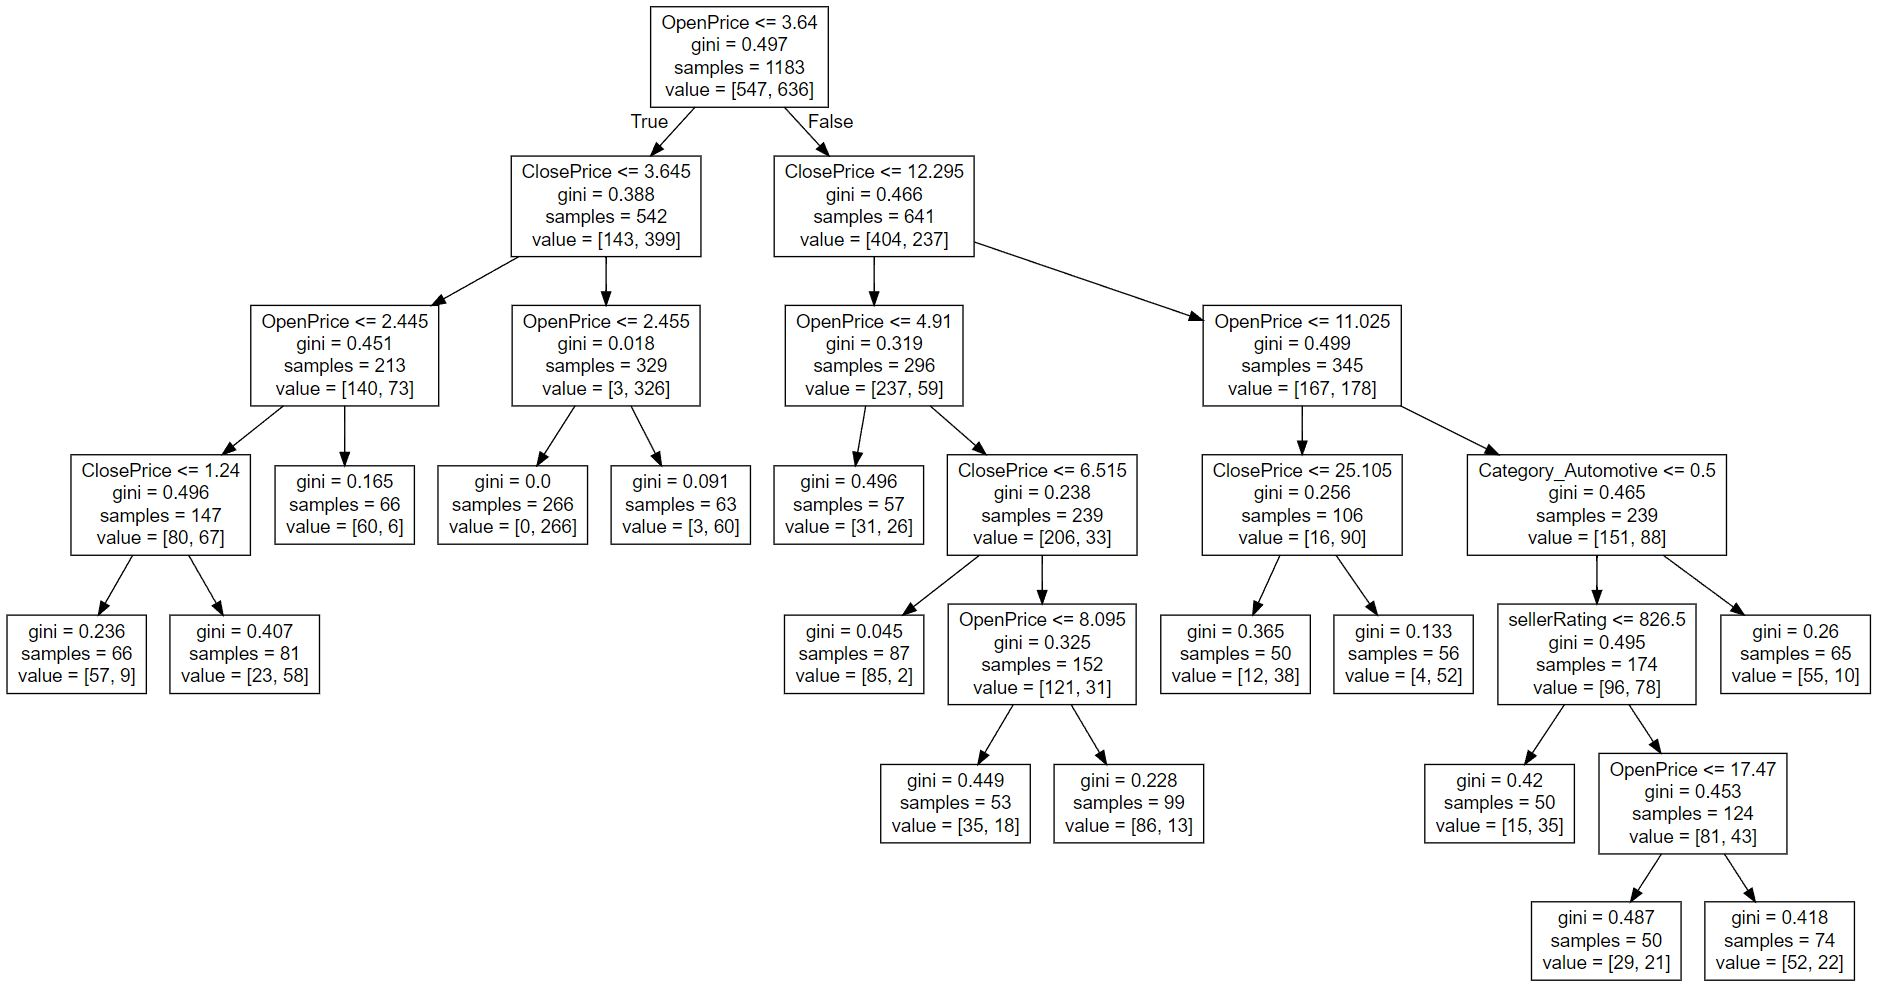

### Smaller Classification Tree
- reduce the number of predictors due to software limatations
    - which would be a good variable(s) to choose? 

- mim_samples_leaf = 50 as well
- only with predictors that can be used for predicting the outcome of a new auction.
- describe the resulting tree in terms of rules. 
- plot the resulting tree as a tree diagram.
- plot the resulting tree on a scatterplot: use the two axes for the two best (quantitative predictors) 
- examine the classification table for the tree.

In [47]:
data_dum.columns

Index(['sellerRating', 'ClosePrice', 'OpenPrice', 'Competitive?',
       'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books',
       'Category_Business/Industrial', 'Category_Clothing/Accessories',
       'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry',
       'Category_Music/Movie/Game', 'Category_Photography',
       'Category_Pottery/Glass', 'Category_SportingGoods',
       'Category_Toys/Hobbies', 'Currency_EUR', 'Currency_GBP', 'Currency_US',
       'endDay_Fri', 'endDay_Mon', 'endDay_Sat', 'endDay_Sun', 'endDay_Thu',
       'endDay_Tue', 'endDay_Wed', 'Duration_1', 'Duration_10', 'Duration_3',
       'Duration_5', 'Duration_7'],
      dtype='object')

For the small tree, `ClosePrice` was removed since it is not a true predictor. After it was removed, the classification tree was fitted, and we discovered that `end Day` and `Currency` do not make any contributions to the splits. These two predictors were also removed for the small tree.

In [48]:
X.columns

Index(['sellerRating', 'ClosePrice', 'OpenPrice', 'Category_Antique/Art/Craft',
       'Category_Automotive', 'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles', 'Category_Computer', 'Category_Electronics',
       'Category_EverythingElse', 'Category_Health/Beauty',
       'Category_Home/Garden', 'Category_Jewelry', 'Category_Music/Movie/Game',
       'Category_Photography', 'Category_Pottery/Glass',
       'Category_SportingGoods', 'Category_Toys/Hobbies', 'Currency_EUR',
       'Currency_GBP', 'Currency_US', 'endDay_Fri', 'endDay_Mon', 'endDay_Sat',
       'endDay_Sun', 'endDay_Thu', 'endDay_Tue', 'endDay_Wed', 'Duration_1',
       'Duration_10', 'Duration_3', 'Duration_5', 'Duration_7'],
      dtype='object')

In [49]:
X_small = X.drop(['ClosePrice', 'Currency_EUR', 'Currency_GBP', 'Currency_US', 'endDay_Fri', 'endDay_Mon', 'endDay_Sat',
       'endDay_Sun', 'endDay_Thu', 'endDay_Tue', 'endDay_Wed'], axis=1)
#X_small = X[['sellerRating', 'OpenPrice']]

In [50]:
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_small,y,test_size=0.4,random_state=100)

In [51]:
var_red_tree = DecisionTreeClassifier(min_samples_leaf=50,random_state=100)

In [52]:
var_red_tree.fit(X_train_s,y_train_s)

DecisionTreeClassifier(min_samples_leaf=50, random_state=100)

In [53]:
var_red_tree.score(X_train_s,y_train_s)

0.7185122569737954

In [54]:
var_red_tree.score(X_test_s,y_test_s)

0.7046894803548795

In [55]:
var_red_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [56]:
classificationSummary(y_train_s, var_red_tree.predict(X_train_s))

Confusion Matrix (Accuracy 0.7185)

       Prediction
Actual   0   1
     0 368 179
     1 154 482


In [57]:
classificationSummary(y_test_s, var_red_tree.predict(X_test_s))

Confusion Matrix (Accuracy 0.7047)

       Prediction
Actual   0   1
     0 230 129
     1 104 326


In [58]:
param_grid = {
    "min_samples_split": [2,3,4,5,6],
    "min_impurity_decrease": [0, 0.0005, 0.001, 0.01]
}

In [59]:
gridSearch_s = GridSearchCV(DecisionTreeClassifier(min_samples_leaf=50,random_state=100), param_grid, cv=5, n_jobs=-1)

In [60]:
gridSearch_s.fit(X_train_s,y_train_s)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(min_samples_leaf=50,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'min_impurity_decrease': [0, 0.0005, 0.001, 0.01],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [61]:
print('Improved Score: ', gridSearch_s.best_score_)
print('Improved Parameters: ', gridSearch_s.best_params_)

Improved Score:  0.7024744332403634
Improved Parameters:  {'min_impurity_decrease': 0, 'min_samples_split': 2}


In [62]:
best_tree_s = gridSearch_s.best_estimator_

In [63]:
classificationSummary(y_train_s, best_tree_s.predict(X_train_s))

Confusion Matrix (Accuracy 0.7185)

       Prediction
Actual   0   1
     0 368 179
     1 154 482


In [64]:
classificationSummary(y_test_s, best_tree_s.predict(X_test_s))

Confusion Matrix (Accuracy 0.7047)

       Prediction
Actual   0   1
     0 230 129
     1 104 326


In [65]:
coeff_df_s = pd.DataFrame(np.transpose(best_tree_s.feature_importances_), 
                        X_train_s.columns, columns=['Coefficient'])

In [66]:
coeff_df_s

,Coefficient
sellerRating,0.325744
OpenPrice,0.598937
Category_Antique/Art/Craft,0.000000
Category_Automotive,0.000000
Category_Books,0.000000
Category_Business/Industrial,0.000000
Category_Clothing/Accessories,0.000000
Category_Coins/Stamps,0.000000
Category_Collectibles,0.000000
Category_Computer,0.000000


In [67]:
export_graphviz(var_red_tree, out_file='smallClassificationTree.dot', feature_names=X_train_s.columns)

Here's the exported graph: 

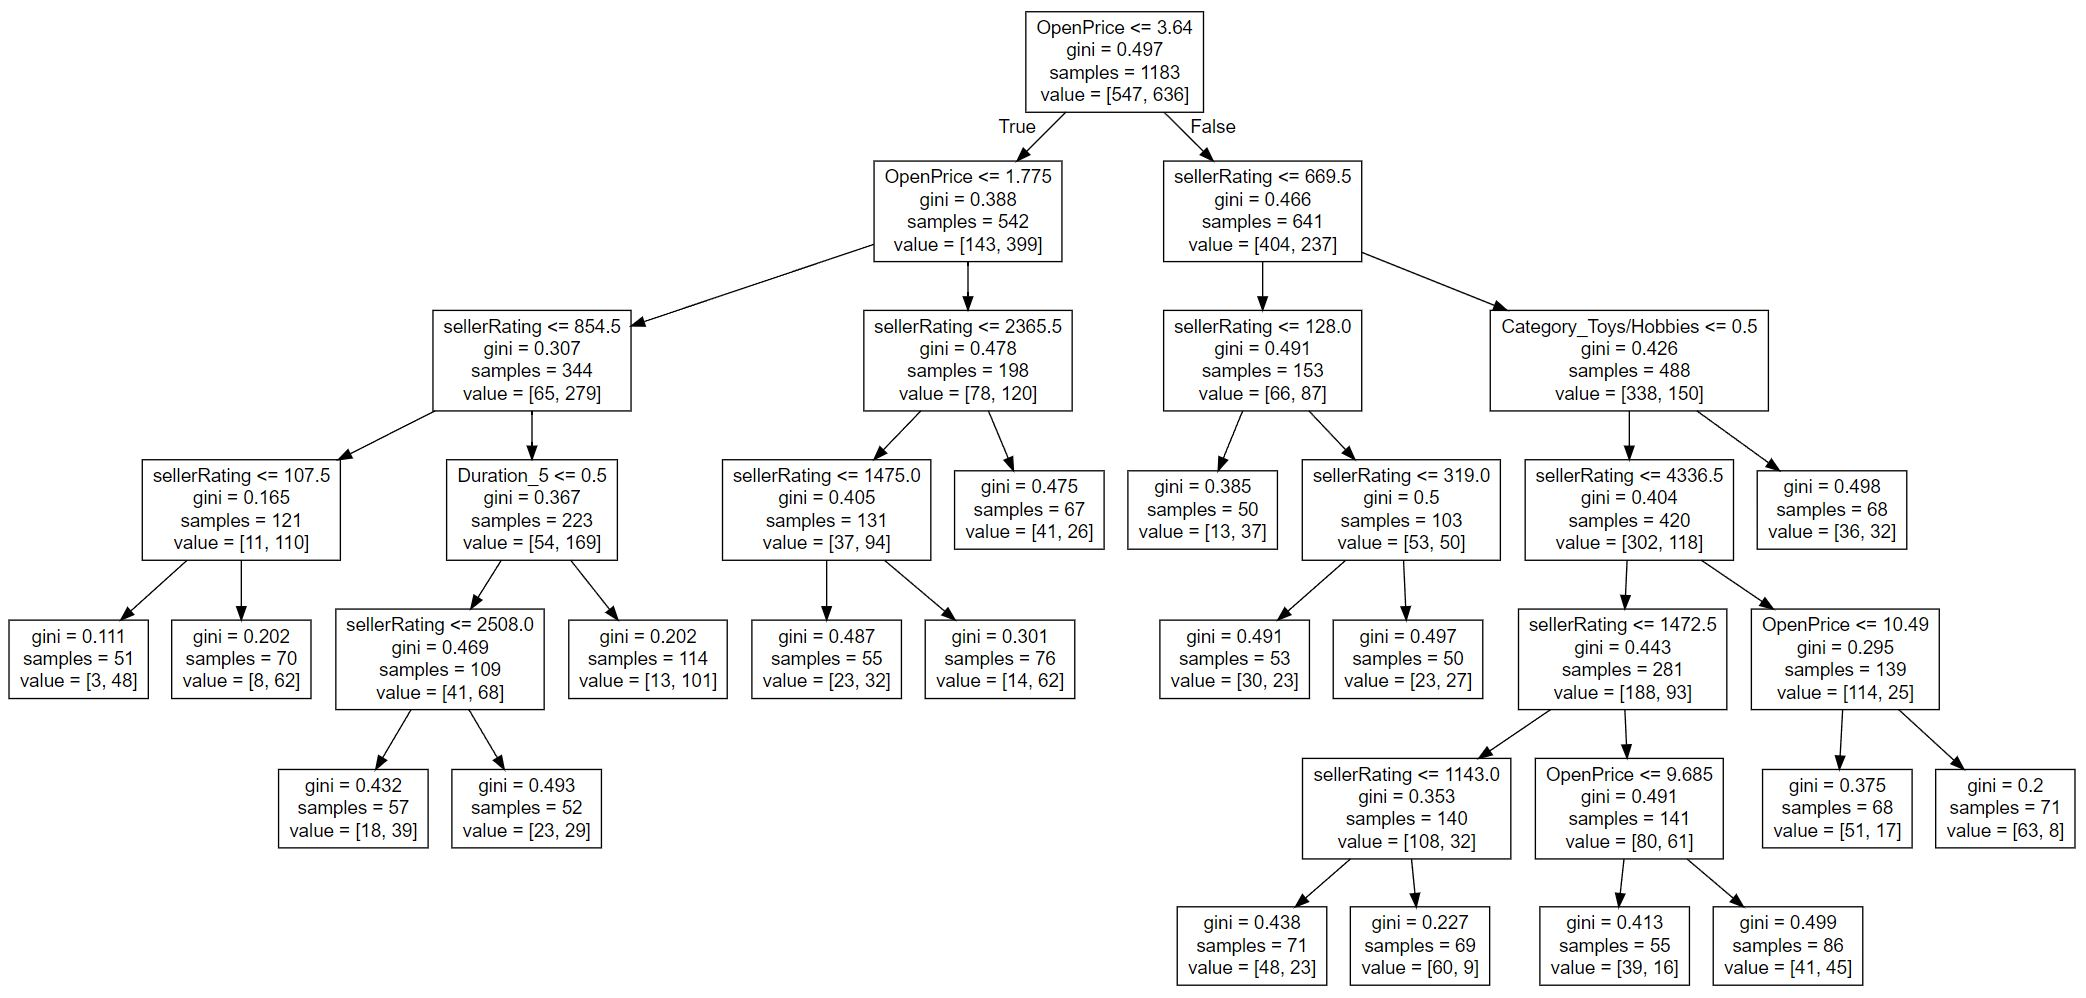

## Scatter Plot 

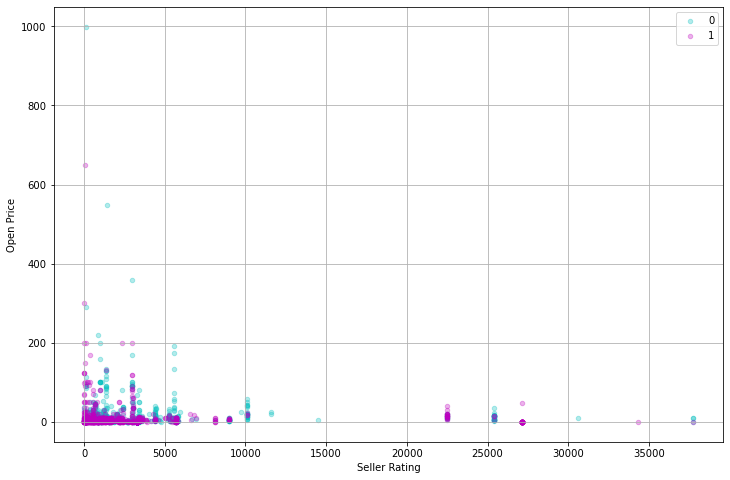

In [68]:
#best two quant predictors: sellerRating, OpenPrice
fig = plt.figure(figsize = (12,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Seller Rating') 
ax.set_ylabel('Open Price') 
targets = [0,1] 
colors = ['c','m'] 
for target, color in zip(targets,colors): 
    indicesToKeep = data['Competitive?'] == target  
    ax.scatter(data.loc[indicesToKeep, 'sellerRating'],
          data.loc[indicesToKeep, 'OpenPrice'], 
          c = color, 
          s = 20,
          alpha=0.3
          ) 
ax.legend(targets)
ax.grid()

Zoomed in version:

(0.0, 200.0)

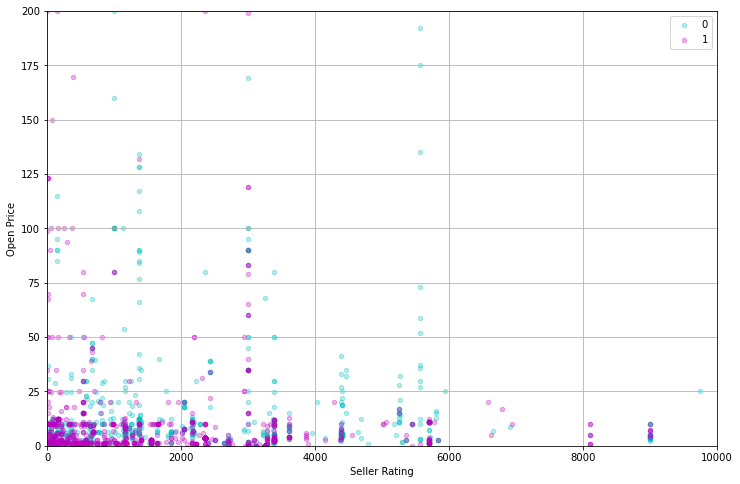

In [69]:
fig = plt.figure(figsize = (12,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Seller Rating') 
ax.set_ylabel('Open Price') 
targets = [0,1] 
colors = ['c','m'] 
for target, color in zip(targets,colors): 
    indicesToKeep = data['Competitive?'] == target  
    ax.scatter(data.loc[indicesToKeep, 'sellerRating'],
          data.loc[indicesToKeep, 'OpenPrice'], 
          c = color, 
          s = 20,
          alpha=0.3
          ) 
ax.legend(targets)
ax.grid()
plt.xlim(0, 10000)
plt.ylim(0, 200)